# Intelivix - Processo de seleção
**Luiz A. Albuquerque Junior**

In [1]:
import pandas as pd
from sklearn import tree
import pandas as pd 
import numpy as np
import math
from sympy import Point, Line,Polygon,Segment
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
import pickle
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
#uso do LSTM
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
drive.mount("/content/drive")

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
# Load libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load Data
df = pd.read_csv('/content/drive/My Drive/intelivix/train.tsv', delimiter='\t')
pd.set_option('display.max_colwidth', -1)
# df[len(df['Texto']) > 30].head()
df1 = df[df['Texto'].apply(lambda x: len(x) > 50)]
df1.head(2000)

,Id,IdSentenca,Texto,Sentimento
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
9,10,1,demonstrating the adage that what is good for the goose,2
27,28,1,"is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",2
28,29,1,"is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story",2
31,32,1,"good for the gander , some of which occasionally amuses but none of which amounts to much of a story",2
32,33,1,"for the gander , some of which occasionally amuses but none of which amounts to much of a story",2
33,34,1,"the gander , some of which occasionally amuses but none of which amounts to much of a story",1


# Análise do dataset


Primeiro verificamos o dataset para termos uma ideia do banco de dados que estamos trabalhando.
Nessa análise verificamos:
  1.   O desbalanceamento das classes.
  2.   A quantidade de caracter por instancia(frase).
  3.   O número de palavras por frase
  4.   As palavras mais frequentes
  





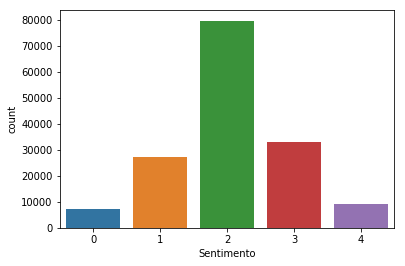

In [0]:
#Primeir
sns.countplot(df['Sentimento'])

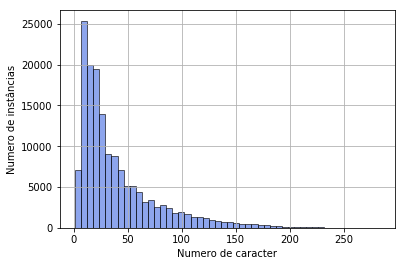

In [0]:
df['tamanho'] = df['Texto'].apply(len)
df['tamanho'].hist(bins=50,ec = "k", alpha = .6, color = "royalblue")
plt.ylabel('Numero de instâncias')
plt.xlabel('Numero de caracter')
plt.grid(which='minor')

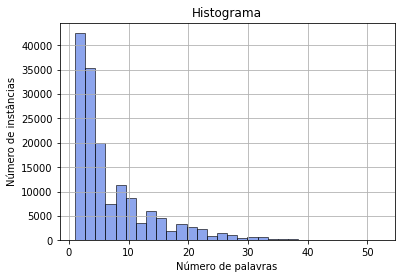

In [0]:
#histograma da quantidade de palavras
totalPalavras = [len(texto.split(" ")) for texto in df['Texto']]
plt.hist(totalPalavras,bins = 30,ec = "k", alpha = .6, color = "royalblue")
plt.title('Histograma')
# plt.xlabel('x')

plt.ylabel('Número de instâncias')
plt.xlabel('Número de palavras')
plt.grid(which='major')

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


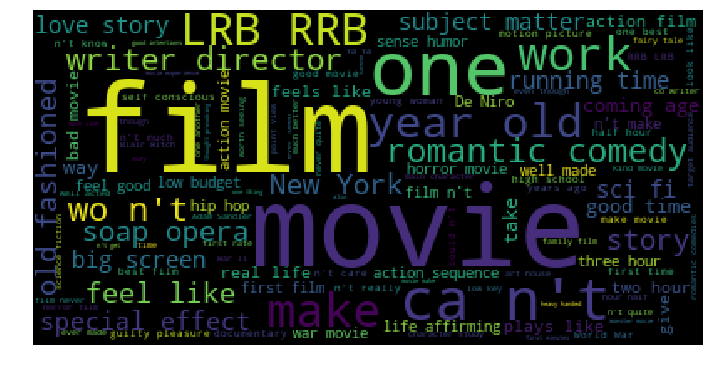

In [0]:
#Palavras mais citadas aparecem em t
import nltk
nltk.download('stopwords')

# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = df['Texto'].to_string()
wordcloud = WordCloud(relative_scaling=0.9,stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Pre-processamento dos dados
Nessa etapa efutamos dois importantes passos:


*   A divisao do *dataset* em conjunto de treinamento e conjunto de teste
*   Extração de características do conjunto de treinamento
A extraçao de caracterisicas se fez com a técnica de "*Bag word*" na qual consiste em substituir cada palavra por um novo numero. Para melhor compreensão veja o exemplo a seguir.
Suponha que seu conjunto de treinamento T seja:


---


T = {
    "Olá meu nome é Luiz" |
    "Qual seu nome" |
    "Meu nome é Albuquerque"
}




---



 Aplicando a técnica teremos:
 

---


 T' = {
    1, 2, 3, 4, 5 |
    6,7,3 |
    2,3,4,8
}
 , onde : 
 Olá = 1 ; meu =2; nome =3; é = 4 Luiz = 5; Qual = 6; seu = 7; Albuquerque = 8

---




In [19]:
# Encode Categorical Variable
from keras.utils import to_categorical
X = df['Texto']
y = to_categorical(df['Sentimento'])
# y = pd.DataFrame(data = df['Sentimento'])
num_classes = df['Sentimento'].nunique()

np.random.seed(101)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(124848,) (31212,) (124848, 5) (31212, 5)


In [0]:

#extração de caracteristicas
from keras.preprocessing.text import Tokenizer
global tokenizer
def myTokenizer(X_train,X_test):
  global tokenizer
  max_features = 15000 # Número máximo de palavras ao codificar palavras para números

  tokenizer = Tokenizer(num_words=max_features)
  # tokenizer = Tokenizer(num_words=max_features, lower = False,char_level = True)   ---->  Ver observação
  tokenizer.fit_on_texts(list(X_train))
#   X_train = tokenizer.texts_to_sequences(X_train)
#   X_test = tokenizer.texts_to_sequences(X_test)
  return tokenizer.texts_to_sequences(X_train), tokenizer.texts_to_sequences(X_test)



#Observação
#Foi realizado teste no qual o "token" se dava a nivel de letras, ao inves de palavras, porém apresentou uma queda na acurácia
#Acredito que essa queda ocorreu devido ao numero de colunas ser maior, pois agora seriam 130 caracteres(colunas) em vez de 30 palavras(colunas)

Do histograma da seção anterior (Análise do *DataSet*), observamos visualmente que mais de 95% das instancia do DataSet tem no máximo 30 palavras(por instância). Portanto construir uma tabela com 30 colunas (palavras) parece bem aceitável para treinar modelos posteriormente.




In [0]:
from keras.preprocessing import sequence
def mySquence(X_train,X_test):
  max_words = 30 #valor extraido do histograma acima
  return sequence.pad_sequences(X_train, maxlen=max_words),sequence.pad_sequences(X_test, maxlen=max_words)
  

  #Gera matriz com 30 de largura
  #Exemplo:
  #    [52,231,125]
  #    [3,205]
  #    [5212,61,25,12]

  #    [0,0,0,0,0,....,52,231,125]
  #    [0,0,0,0,0,....,3,205]
  #    [0,0,0,0,0,....,5212,61,25,12]



In [0]:
X_train, X_test = myTokenizer(X_train,X_test)
X_train, X_test = mySquence(X_train,X_test)

A tabela resultante pode ser exibida a seguir:

In [7]:
XX = pd.DataFrame(data = X_train)
XX.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,662,1234
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,5,250,89,2,46,53
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,675,2969
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4407,12,121,85,3578
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2079,2680
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2170,7289,2294,38,14,3268,19,12021,66,1,2415,58,3829
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,73,130,4,356,232,4,204
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,357,4,3082,4,203,3,1,315,44,37,14,240
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,624
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2295


Observe que muito dessas colunas tem o valor zero. Essa propriedade é explorada na biblioteca *scikit-learn* onde recebe o nome de Matriz esparsa, podendo ser melhor manipulada em computadores tradicionais (8 GB de RAM). Mais tarde exploraremos essa propriedade...

# Classificadores
Uma vez extraidas as características do *dataset*, ou seja, transformado texto para número, está na hora de testar alguns classificadores bastantes usados em processamento de texto.

**Long short-term memory (LSTM)**

In [0]:
#Funções auxiliares no LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
global mcp_save
batch_size = 128
epochs = 10
def get_model(max_features, embed_dim):
    np.random.seed(42)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model
def model_train(model):
    # train the model
    global mcp_save    
    earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
    adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
    mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
    model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
    plot_model_history(model_history)
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Modelo da Acurácia')
    axs[0].set_ylabel('Acuracia')
    axs[0].set_xlabel('Época')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['Treino', 'Validação'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[0].set_title('Modelo Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Época')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['Treino', 'Validação'], loc='best')
    plt.show()
def model_evaluate(bestModel): 
    # predict class with test set
    y_pred_test =  bestModel.model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Acuracia:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    
    
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 120s - loss: 0.9961 - acc: 0.5986 - val_loss: 0.8471 - val_acc: 0.6533

Epoch 00001: val_acc improved from -inf to 0.65327, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 119s - loss: 0.7832 - acc: 0.6790 - val_loss: 0.8144 - val_acc: 0.6670

Epoch 00002: val_acc improved from 0.65327 to 0.

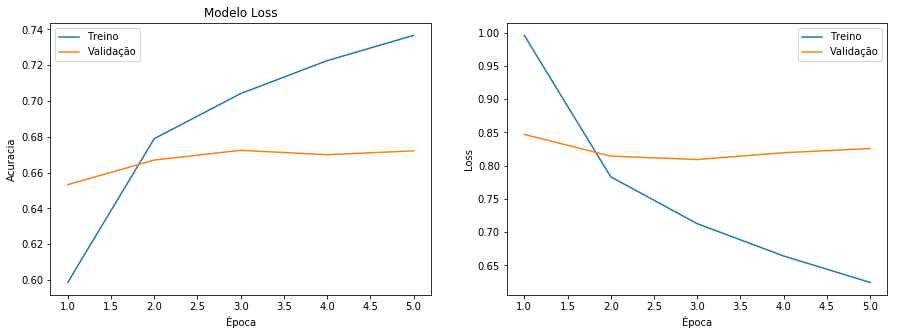

CPU times: user 18min 22s, sys: 46.1 s, total: 19min 8s
Wall time: 9min 53s

Análise do melhor modelo:
Acuracia:	67.2%


              precision    recall  f1-score   support

           0       0.57      0.33      0.42      1414
           1       0.54      0.58      0.56      5455
           2       0.74      0.82      0.78     15916
           3       0.61      0.53      0.57      6586
           4       0.60      0.44      0.51      1841

    accuracy                           0.67     31212
   macro avg       0.61      0.54      0.57     31212
weighted avg       0.67      0.67      0.67     31212



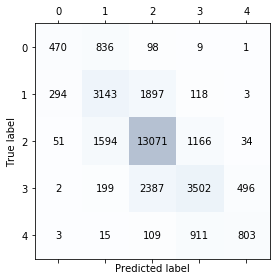

In [24]:
# Usando LSMT
max_features = 15000
embed_dim = 100
model = get_model(max_features, embed_dim)
%time model_train(model)
# Melhor maquina
print("\nAnálise do melhor modelo:")
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
model.load_weights(adress)
model_evaluate(model)

**Global Vectors for Word Representation (GloVe)**:
Adicionando a técnica GloVe ao LSTM podemos melhorar um pouco mais a acuracia do classificador.
Tal técnica se baseia fortemente nos significado das palavras de forma a dar uma leve noção de contexto para o classificador.
Para mais detalhe acessar:
[GloVe](https:// https://www.aclweb.org/anthology/D14-1162) disponivel em Junho de 2019

---

Utilizamos os arquivos :

*   glove.6B.100d
*   glove.6B.300d

---


Tais arquivos são facilmente encontrados na rede mundial de computadores, a Internet. Recomendo fortemente a leitura do artigo para saber mais sobre a técnica *GloVe*




Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1528000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,608,905
Trainable params: 1,608,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 114s - loss: 0.9590 - acc: 0.6045 - val_loss: 0.8425 - val_acc: 0.6480

Epoch 00001: val_acc improved from -inf to 0.64799, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 112s - loss: 0.8021 - acc: 0.6672 - val_loss: 0.7992 - val_acc: 0.6643

Epoch 00002: val_acc 

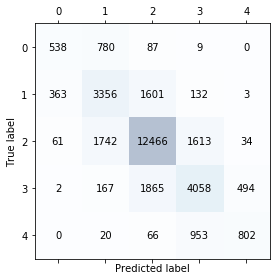

In [25]:
##### TESTE
batch_size = 128
epochs = 10
def get_model_glove(max_features, embed_dim, embedding_matrix):
    np.random.seed(42)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],weights=[embedding_matrix]))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=20000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix
# embedding matrix
EMBEDDING_FILE = '/content/drive/My Drive/intelivix/glove.6B.100d.txt'
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)
# train the model
model = get_model_glove(max_features, embed_dim, embedding_matrix)
earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
%time model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
# Melhor maquina
print("\nAnálise do melhor modelo:")
model.load_weights(adress)
model_evaluate(model)


In [0]:
##### TESTE
batch_size = 128
epochs = 10
def get_model_glove(max_features, embed_dim, embedding_matrix):
    np.random.seed(42)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],weights=[embedding_matrix]))
    model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=20000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix
# embedding matrix
EMBEDDING_FILE = '/content/drive/My Drive/intelivix/glove.6B.300d.txt'
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
embed_dim = 300 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)
# train the model
model = get_model_glove(max_features, embed_dim, embedding_matrix)
earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
%time model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
# Melhor maquina
print("\nAnálise do melhor modelo:")
model.load_weights(adress)
model_evaluate(model)



Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           4584000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1505      
Total params: 5,306,705
Trainable params: 5,306,705
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 637s - loss: 0.9006 - acc: 0.6270 - val_loss: 0.8086 - val_acc: 0.6635

Epoch 00001: val_acc improved from -inf to 0.66346, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 629s - loss: 0.7455 - acc: 0.6906 - val_loss: 0.7741 - val_acc: 0.6775

Epoch 00002: val_acc 

**Testando com outros classificadores**

**Random Forest Classifier**

In [0]:
clf =  RandomForestClassifier(n_estimators=200,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


num 100
0.8330577982827118
num 200
0.8336665385108292
num 500
0.8340125592720748
num 1000


**Naive Bayes**

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

**Linear Model**

In [0]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=1000, tol=None)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

**SVM Linear SVC**


In [0]:
from sklearn import svm
svc = svm.LinearSVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.06      0.07      1414
           1       0.22      0.12      0.15      5455
           2       0.56      0.61      0.58     15916
           3       0.21      0.26      0.23      6586
           4       0.10      0.10      0.10      1841

    accuracy                           0.39     31212
   macro avg       0.23      0.23      0.23     31212
weighted avg       0.38      0.39      0.38     31212



Um pequeno ajuste na xtração de caracteristica

In [0]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import LancasterStemmer

def lemmatizer(sentence):
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(sentence)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  return lemmatized_output

# https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
def myStemmer(texto):
  word_list = texto.split()
  lancaster=LancasterStemmer()
  stemmer = ' '.join([lancaster.stem(w) for w in word_list])
  return stemmer
  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Aplicando técnica de Lemmatizer** 

In [0]:

df = pd.read_csv('/content/drive/My Drive/intelivix/train.tsv', delimiter='\t')
pd.set_option('display.max_colwidth', -1)
df['Texto'] = df.apply(lambda x: lemmatizer(x['Texto']), axis=1)
df = df[df['Texto'].apply(lambda x: len(x) > 2)]
X = df['Texto']
y = to_categorical(df['Sentimento'])
num_classes = df['Sentimento'].nunique()

np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
X_train, X_test = myTokenizer(X_train,X_test)
X_train, X_test = mySquence(X_train,X_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 110s - loss: 0.9964 - acc: 0.5982 - val_loss: 0.8488 - val_acc: 0.6537

Epoch 00001: val_acc improved from -inf to 0.65369, saving model to /content/drive/My Drive/intelivix/.mdl_wts.hdf5
Epoch 2/10
 - 110s - loss: 0.7880 - acc: 0.6770 - val_loss: 0.8159 - val_acc: 0.6644

Epoch 00002: val_acc improved from 0.65369 to 0.6643

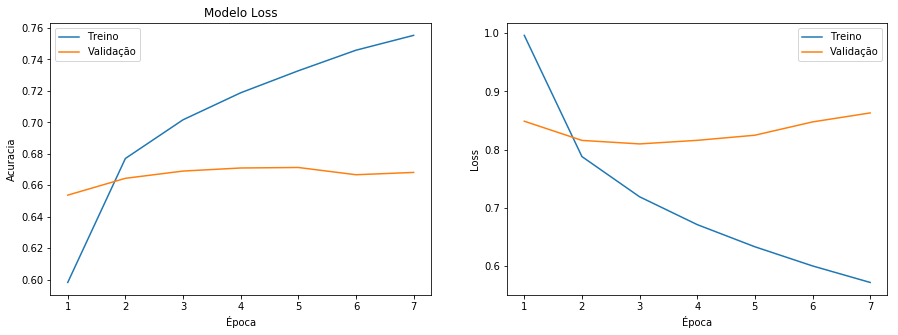

CPU times: user 23min 55s, sys: 1min 2s, total: 24min 58s
Wall time: 12min 57s

Análise do melhor modelo:
Acuracia:	67.1%


              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1414
           1       0.55      0.59      0.57      5455
           2       0.75      0.80      0.78     15916
           3       0.60      0.56      0.58      6586
           4       0.58      0.44      0.50      1841

    accuracy                           0.67     31212
   macro avg       0.60      0.55      0.57     31212
weighted avg       0.67      0.67      0.67     31212



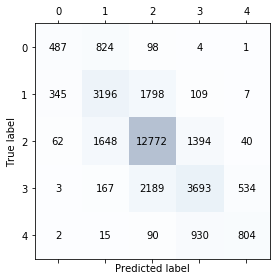

In [76]:
max_features = 15000
embed_dim = 100
model = get_model(max_features, embed_dim)
%time model_train(model)
print("\nAnálise do melhor modelo:")
adress = '/content/drive/My Drive/intelivix/.mdl_wts.hdf5'
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))
model.add(Dense(num_classes, activation='softmax'))
model.load_weights(adress)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_evaluate(model)


**Aplicando técnica de Stemmer** 

In [0]:

df = pd.read_csv('/content/drive/My Drive/intelivix/train.tsv', delimiter='\t')
pd.set_option('display.max_colwidth', -1)
df['Texto'] = df.apply(lambda x: myStemmer(x['Texto']), axis=1)
df = df[df['Texto'].apply(lambda x: len(x) > 2)]
X = df['Texto']
y = to_categorical(df['Sentimento'])
num_classes = df['Sentimento'].nunique()

np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
X_train, X_test = myTokenizer(X_train,X_test)
X_train, X_test = mySquence(X_train,X_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 110s - loss: 0.9964 - acc: 0.5982 - val_loss: 0.8488 - val_acc: 0.6537

Epoch 00001: val_acc improved from -inf to 0.65369, saving model to /content/drive/My Drive/intelivix/.mdl_wts.hdf5
Epoch 2/10
 - 110s - loss: 0.7880 - acc: 0.6770 - val_loss: 0.8159 - val_acc: 0.6644

Epoch 00002: val_acc improved from 0.65369 to 0.6643

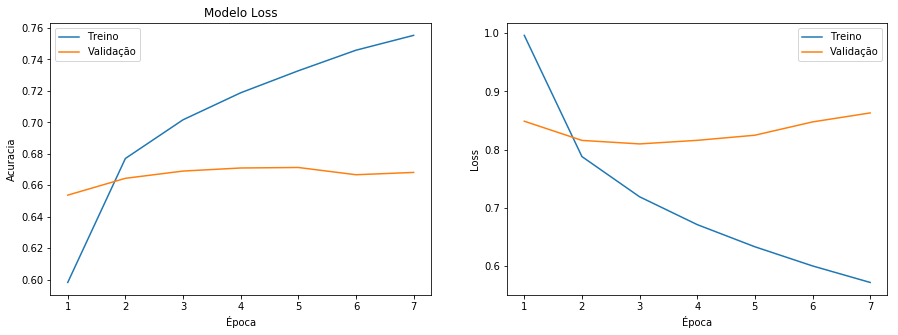

CPU times: user 23min 55s, sys: 1min 2s, total: 24min 58s
Wall time: 12min 57s

Análise do melhor modelo:
Acuracia:	67.1%


              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1414
           1       0.55      0.59      0.57      5455
           2       0.75      0.80      0.78     15916
           3       0.60      0.56      0.58      6586
           4       0.58      0.44      0.50      1841

    accuracy                           0.67     31212
   macro avg       0.60      0.55      0.57     31212
weighted avg       0.67      0.67      0.67     31212



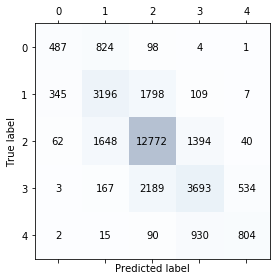

In [0]:
max_features = 15000
embed_dim = 100
model = get_model(max_features, embed_dim)
%time model_train(model)
print("\nAnálise do melhor modelo:")
adress = '/content/drive/My Drive/intelivix/.mdl_wts.hdf5'
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))
model.add(Dense(num_classes, activation='softmax'))
model.load_weights(adress)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_evaluate(model)


# Outra abordagem

In [0]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,max_iter=1000, tol=None)),
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(Y_test, predicted))
   

In [0]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=100,random_state=0)),
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)
print(classification_report(Y_test, predicted))

In [0]:
from sklearn.ensemble import AdaBoostClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=15,random_state=0)),
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.46      0.36      0.41      1414
           1       0.55      0.44      0.49      5455
           2       0.70      0.84      0.76     15917
           3       0.57      0.45      0.50      6585
           4       0.50      0.39      0.44      1841

    accuracy                           0.64     31212
   macro avg       0.56      0.49      0.52     31212
weighted avg       0.62      0.64      0.62     31212



In [0]:
from sklearn.ensemble import AdaBoostClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=49,random_state=0)),
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.46      0.36      0.40      1414
           1       0.56      0.44      0.49      5455
           2       0.70      0.84      0.76     15917
           3       0.57      0.45      0.51      6585
           4       0.50      0.39      0.44      1841

    accuracy                           0.64     31212
   macro avg       0.56      0.50      0.52     31212
weighted avg       0.62      0.64      0.63     31212



In [0]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,max_iter=1000, tol=None)),
])

text_clf.fit(X_train, Y_train)  

%time predicted = text_clf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(Y_test, predicted))
   

In [0]:

from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

# xclas = 
# xclas.fit(X_train, Y_train)  
# xclas.predict(X_test)  

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',XGBClassifier())  # and for classifier  
])

%time text_clf.fit(X_train, Y_train)  

predicted = text_clf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(Y_test, predicted))

# Conclusões

O melhor classificador foi lsmt  obteve 68% de acuracia.